In [1]:
%matplotlib inline
import numpy as np
from nicks_plot_utils import Hist1D, Hist2D, Scatter
import matplotlib.pyplot as plt
import pandas as pd
from lmfit.models import *
from scipy import stats

Welcome to JupyROOT 6.22/09


In [2]:
mu = 0.0
sigma = 0.2
num = 10_000_000

data = pd.DataFrame({'W' : np.random.gumbel(mu, sigma, num),
                     'y' : np.random.normal(mu, 0.1, num),
                     'z' : np.random.normal(0.5, 0.5, num)})

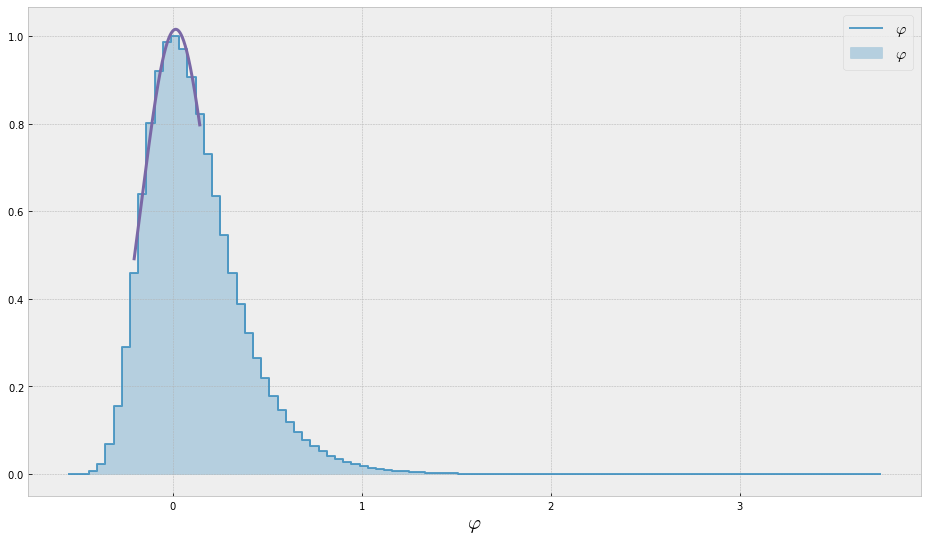

In [3]:
testHist = Hist1D(data=data.W, name="$\\varphi$")

testHist.histogram(fill_alpha=0.3)
testHist.fitGaussian(fit_range=[-0.2, 0.2])

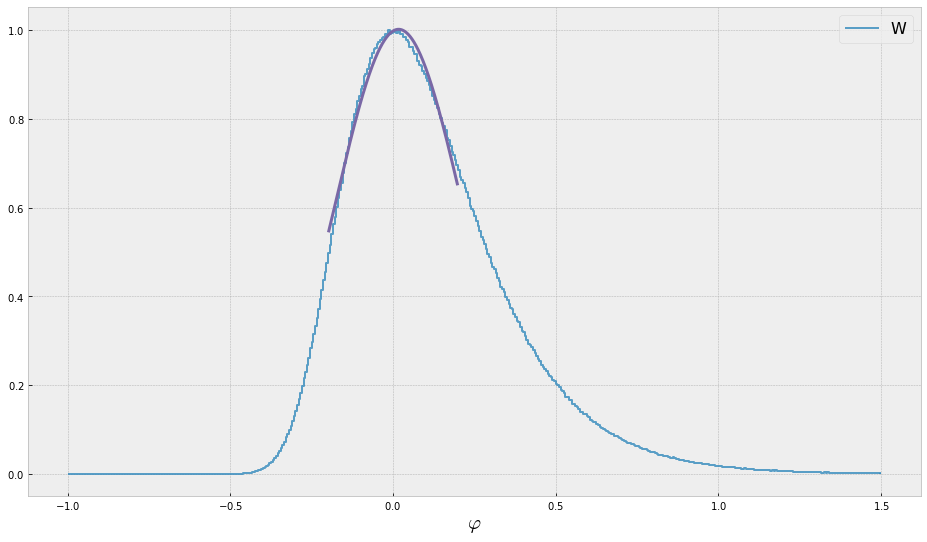

In [4]:
fig, ax = plt.subplots(figsize=(16,9))
testHist = Hist1D(data=data.W, bins=500, name="$\\varphi$", xrange=[-1.0, 1.5])
testHist.fill(data.W)

testHist.histogram()

testHist.fitGaussian(fit_range=[-0.2, 0.2])

<ipython-input-5-95ebdd9e92ee>:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = pylandau.landau(x, mpv, eta, A)
<ipython-input-5-95ebdd9e92ee>:14: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return pylandau.landau(x, mpv=mpv, eta=eta, A=A)


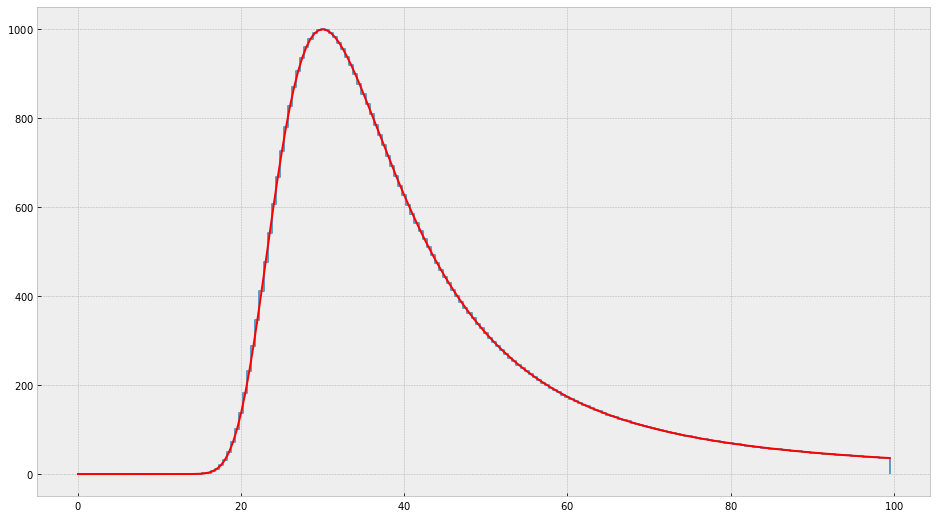

In [5]:
import pylandau
# Make a landau from pylandau
mpv, eta, sigma, A = 30, 5, 4, 1000
x = np.arange(0, 100, 0.5)
y = pylandau.landau(x, mpv, eta, A)

# Put it into plot utils as a scatter object
land = Scatter(x, y)
# Should work the same from this step as a Hist1D object
land.histogram()

## Magic wrapper to let lmfit use the model
def landau(x, mpv=0, eta=1, A=1):
    return pylandau.landau(x, mpv=mpv, eta=eta, A=A)

# Make a custom model and params
mod = Model(landau, independent_vars=['x'])
pars = mod.make_params()
pars['mpv'].set(value=x[np.argmax(y)])
pars['eta'].set(value=5, min=1, max=10)
pars['A'].set(value=np.max(y), min=1)

# Fit and draw the model
out = land.customModel(mod, params=pars)
plt.plot(x, out.best_fit, 'r-', label='best fit')
plt.show()

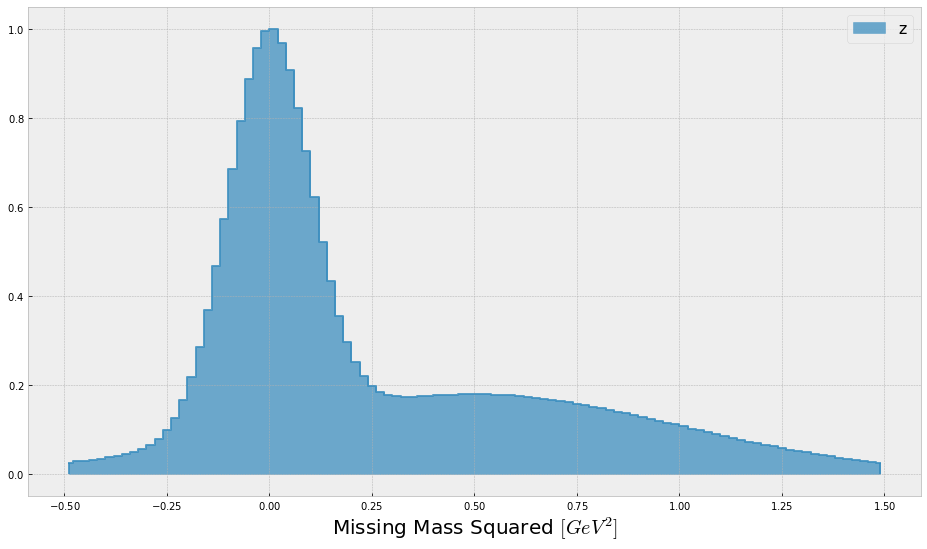

In [6]:
testHist2 = Hist1D(xrange=[-0.5, 1.5], bins=100, name='Missing Mass Squared $[GeV^2]$')
testHist2.fill(data.y)
testHist2.fill(data.z)
testHist2.histogram(filled=True)

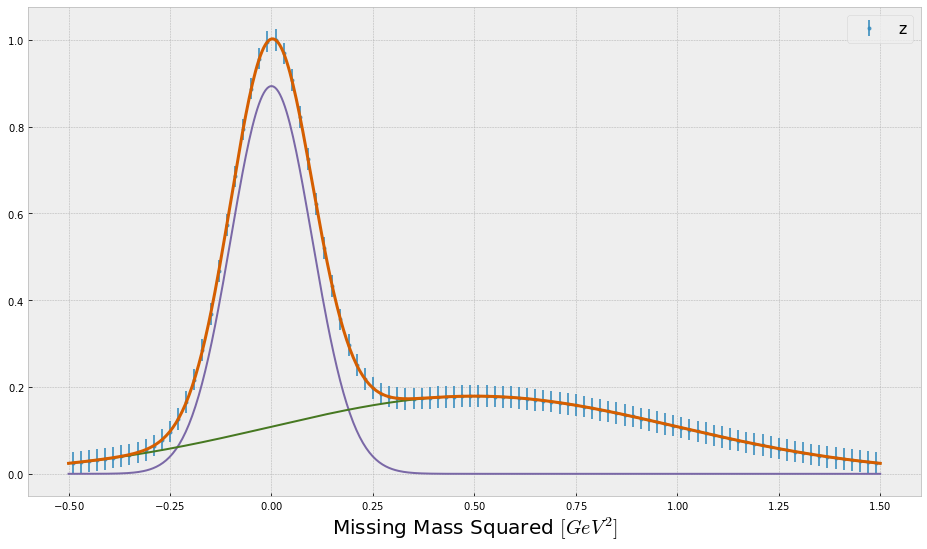

In [7]:
testHist2.histogram(ax, filled=True)

gauss1 = GaussianModel(prefix='g1_')
pars = gauss1.guess(testHist2.y, x=testHist2.x)

pars['g1_center'].set(value=0.0)
pars['g1_sigma'].set(value=0.2)


gauss2 = GaussianModel(prefix='g2_')
pars.update(gauss2.make_params())

pars['g2_center'].set(value=-0.3)
pars['g2_sigma'].set(value=0.5)


mod = gauss1 + gauss2

testHist2.errorbar()
testHist2.customModel(mod, params=pars)


/usr/local/lib/python3.9/site-packages/lmfit-1.0.2-py3.9.egg/lmfit/models.py:1246: FutureWarning: Please correct the name of your built-in model: DonaichModel --> DoniachModel. The incorrect spelling will be removed in a later release.
  warnings.warn(FutureWarning(msg))


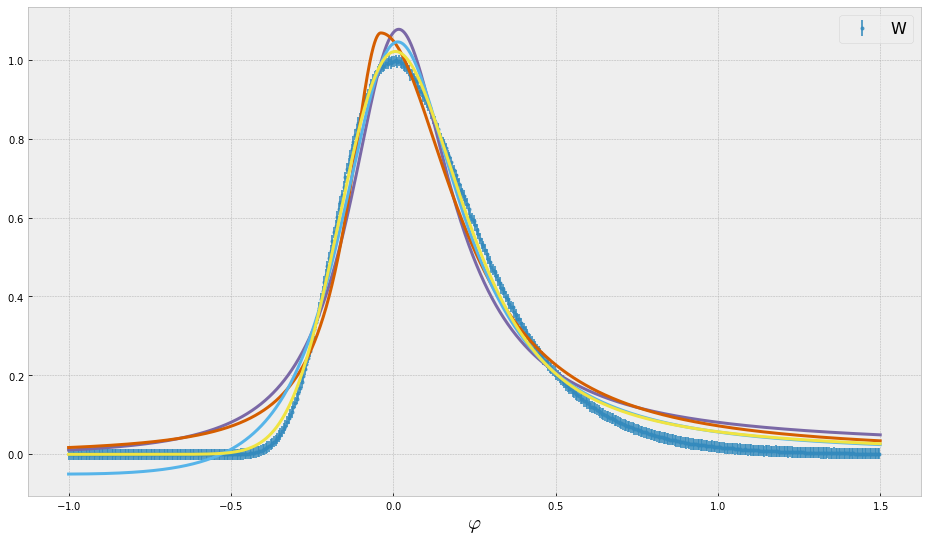

In [8]:
testHist.errorbar()
testHist.fitBreitWigner()
testHist.fitSplitLorentzian()
testHist.fitDonaich()
testHist.fitSkewedVoigt();